In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import os

from spectrum import FitsSpectrum
from common import list_files, list_directories, tqdm

In [ ]:
dib_centers_all = [float(dib_file.replace('.ascii', '')) for dib_file in os.listdir('data/dibs')]
dib_centers_subset = [5780,5797,6196,6379,6613,7224]

def load_target(target_dir: str) -> list[FitsSpectrum]:
    return [FitsSpectrum(datafile) for band_dir in list_directories(target_dir) for datafile in list_files(band_dir)]

def fit_gaussian_for_targets(targets: list | str, dib_centra_list: list, filename: str = None, create_figure = False):
    headers = ['Observation date', 'Target', '# Gaussians', 'Center [Å]', 'Width', 'Amplitude', 'Skew', 'RMSE', 'FWHM [Å]', 'EW [Å]']
    table_data = []

    if type(targets) == str:
        targets = [targets]

    targets_tqdm = tqdm(targets)
    for target in targets_tqdm:
        export_data = []
        subspectra = load_target(f'data/fits/{target}')
        
        for subspectrum in subspectra:
            wvl_max, wvl_min = np.max(subspectrum.wavelength), np.min(subspectrum.wavelength)
            targets_tqdm.set_description(f'{target} | λ={wvl_min:.4g}-{wvl_max:.4g}')

            subspectrum.remove_outliers()
            subspectrum.normalize(max_degree=10)
            subspectrum.correct_shift()

            for center in dib_centra_list:
                # The DIB does not lie in this subspectrum
                if not wvl_min < center < wvl_max:
                    continue

                ax = None
                if create_figure:
                    _, ax = plt.subplots(1, 1, figsize=(15, 9))

                result = subspectrum.select_dib(center, ax=ax)

                if result is None:
                    continue

                params, rmse, fwhm, ew, n_gaussians = result
                table_data.append([subspectrum.format_obs_date(), subspectrum.target, n_gaussians, *np.column_stack(params), rmse, fwhm, ew])

                if filename is not None:
                    export_data.append([subspectrum.obs_date.isoformat(), subspectrum.target, n_gaussians, *params.flatten(), rmse, fwhm, ew])

        if filename is not None:
            np.savetxt(f'out/{target}_{filename}', export_data, fmt='%s', header=' '.join(headers))

    return tabulate(table_data, headers, tablefmt='html')


HD185859 | λ=8523-1.043e+04: 100%|██████████| 1/1 [00:24<00:00, 24.24s/it]


Observation date,Target,# Gaussians,Center [Å],Width,Amplitude,Skew,RMSE,FWHM [Å],EW [Å]
"20-09-2015, 01:47:39",HD185859,3,[5779.56652353 5780.49830569 5780.99999998],[0.31333988 0.29343503 0.49817061],[0.08458384 0.07773266 0.05350049],[-0.029057 0.26978531 -0.07551653],0.00285356,1.1731,0.273437
"20-09-2015, 01:47:39",HD185859,3,[5796.9885987 5796.98425784 5796.47357193],[0.15144625 0.06643516 0.32950155],[0.00250436 0.081905 0.00763198],[ 4.74773646 0.35698926 -3.24403231],0.00260408,0.775917,0.159716
"20-09-2015, 01:47:39",HD185859,3,[6195.72547751 6195.91308611 6195.48147747],[0.0706257 0.0570708 0.12469052],[0.093566 0.04753854 0.01480299],[-0.19054519 0.32824412 -1.04259 ],0.00155547,0.293624,0.0424764
"20-09-2015, 01:47:39",HD185859,3,[6378.82972468 6379.03663604 6379.10927977],[0.12719302 0.07669165 0.098639 ],[0.11749405 0.10526695 0.09501451],[-0.45926545 0.08094568 -1.20994903],0.00144269,0.299517,0.134532
"20-09-2015, 01:47:39",HD185859,3,[6613.00138077 6612.88144067 6613.4618967 ],[0.07316533 0.50343836 0.20420258],[0.1082451 0.00083912 0.19202544],[-0.15916088 -4.34738841 0.21270234],0.00416522,1.18551,0.206688
"14-08-2016, 01:36:06",HD185859,3,[5779.92781191 5780.99994459 5779.96192757],[0.32277512 0.57820356 0.48111984],[0.00603799 0.03635771 0.10503127],[ 2.09564791 -0.2876095 -0.3616722 ],0.00187549,1.36157,0.286626
"14-08-2016, 01:36:06",HD185859,3,[5796.75154582 5797.0072457 5796.97655521],[0.10725965 0.0566794 0.24749691],[0.17050722 0.06332482 0.08897791],[ 0.17900904 0.19218276 -0.33695327],0.00278912,0.582811,0.160682
"14-08-2016, 01:36:06",HD185859,3,[6195.90036618 6195.6699246 6195.62211699],[0.05975068 0.0629813 0.08758949],[0.06733369 0.00288137 0.06490215],[ 0.29288125 -2.89256685 -0.67963677],0.00212831,0.206257,0.0418965
"14-08-2016, 01:36:06",HD185859,3,[6378.97808594 6379.01586942 6379.13680131],[0.14784481 0.06995047 0.09180589],[0.14630921 0.07247039 0.09928151],[-0.02475636 0.19946488 -0.92687362],0.000962738,0.348148,0.134602
"14-08-2016, 01:36:06",HD185859,3,[6612.99221128 6613.46323914 6613.00803466],[0.42648768 0.19332412 0.07340624],[0.00167166 0.18017677 0.11404679],[-4.03827792 0.27071304 -0.15881122],0.00354362,1.0043,0.203943


findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


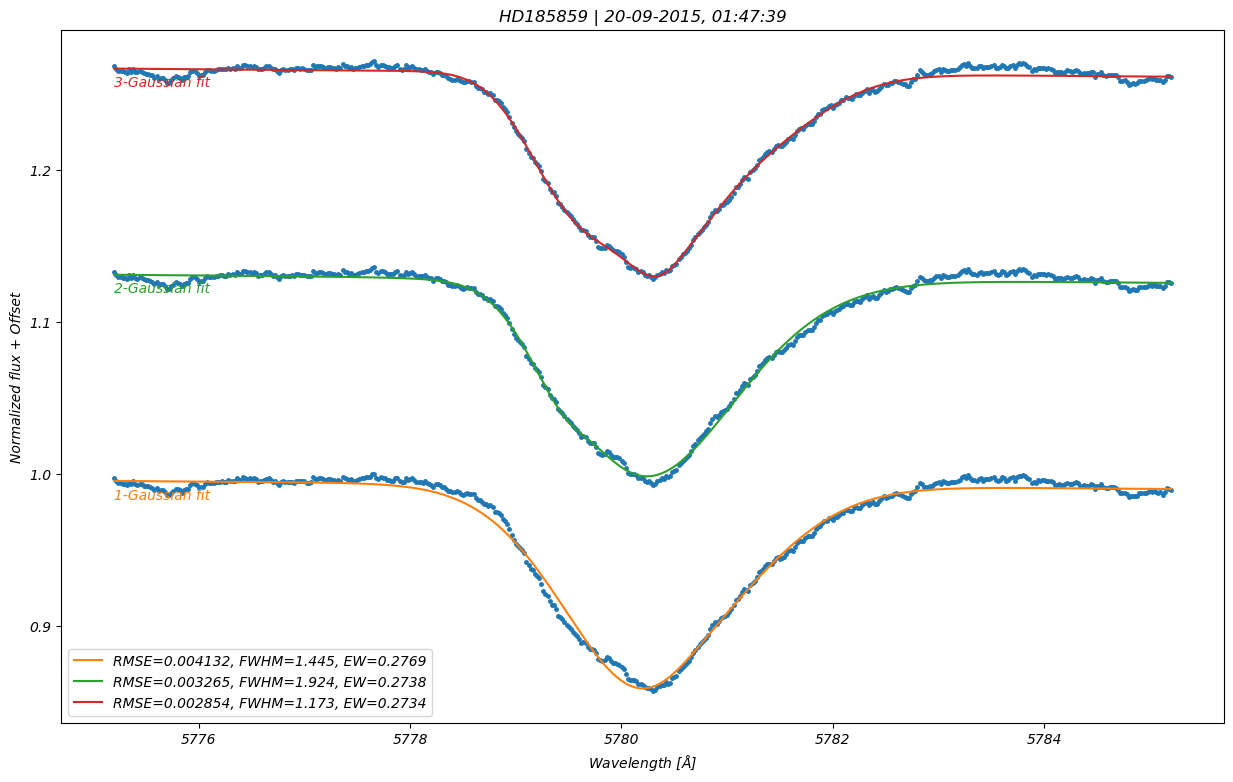

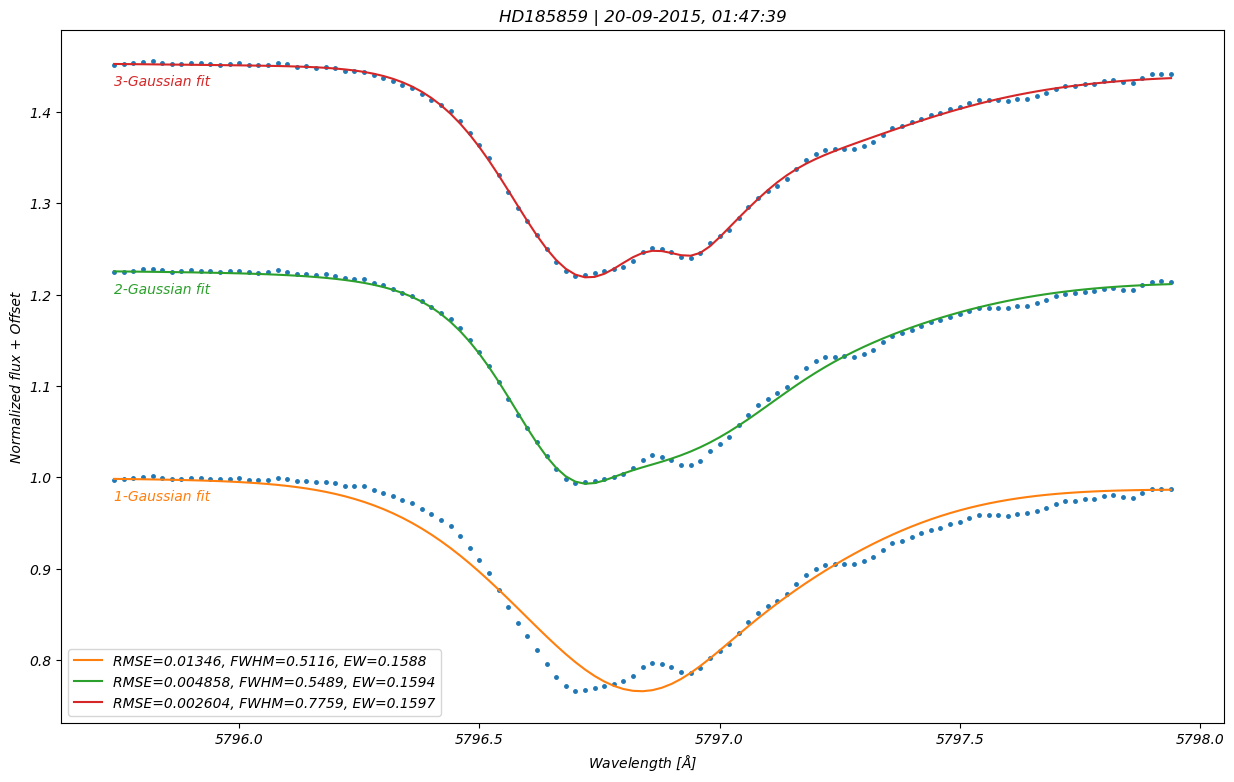

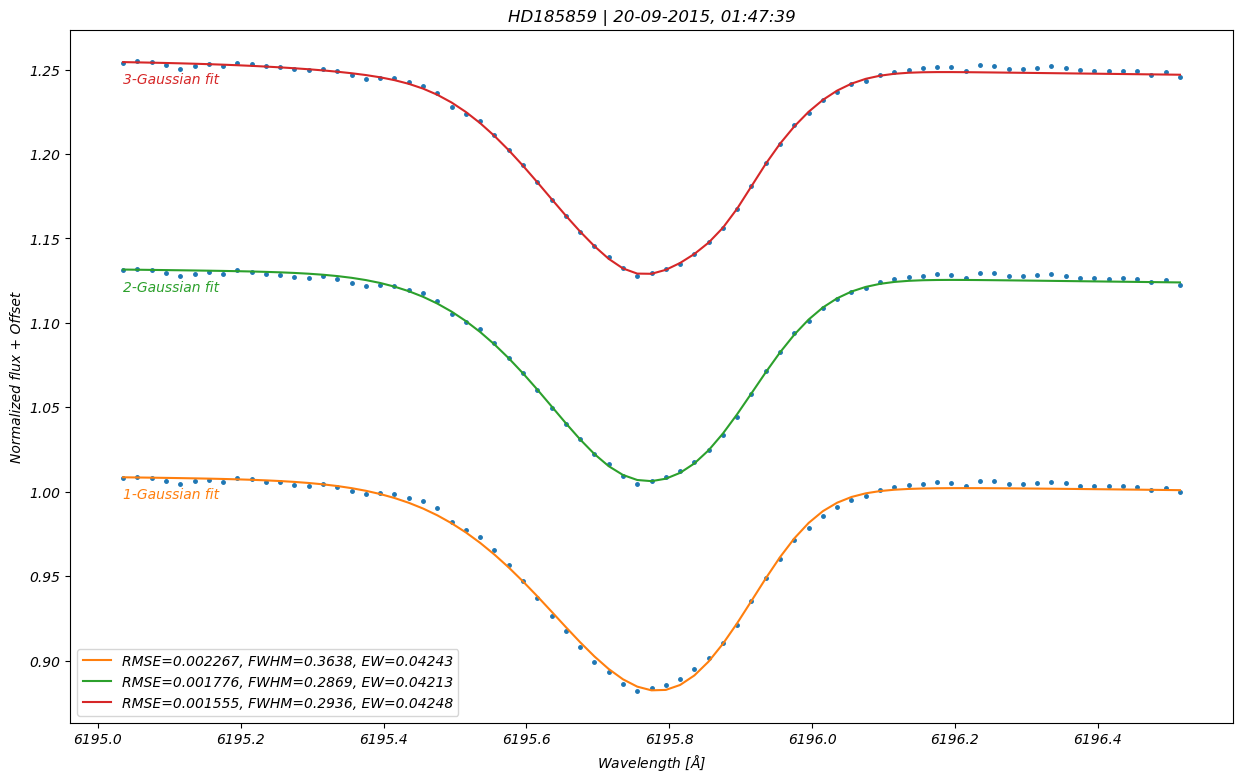

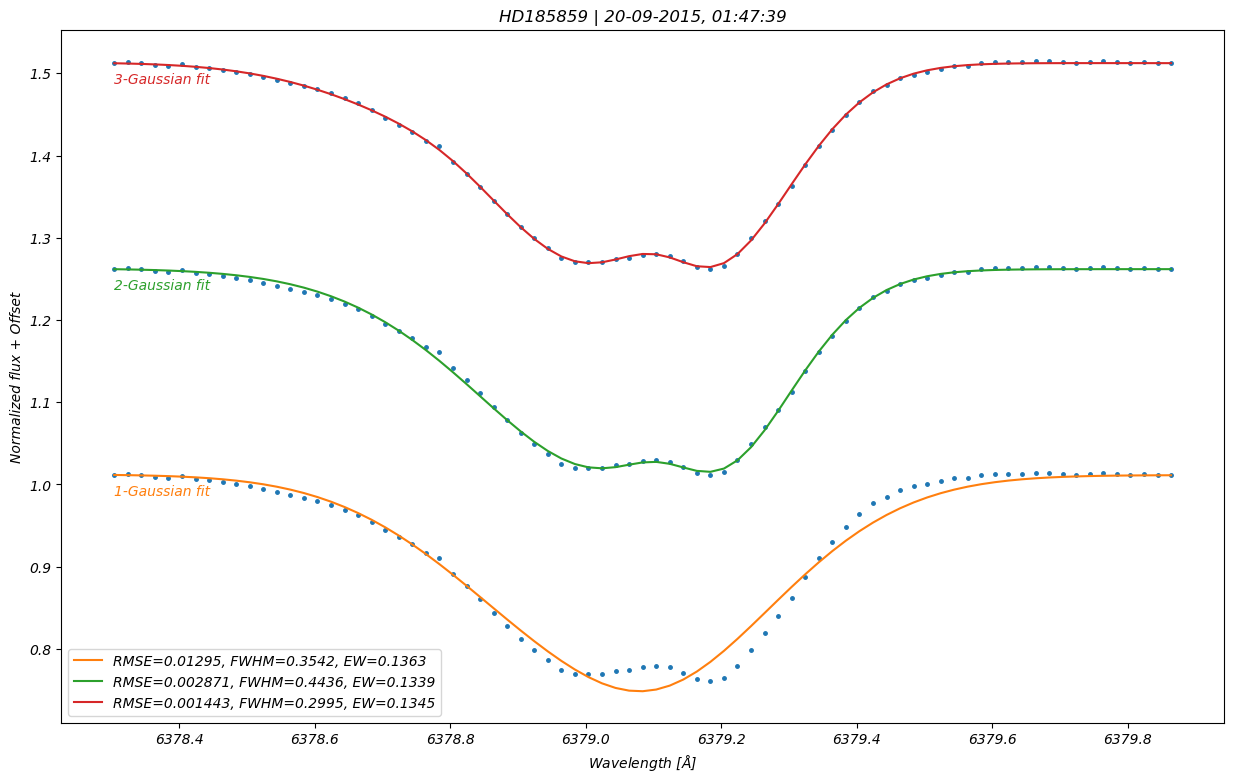

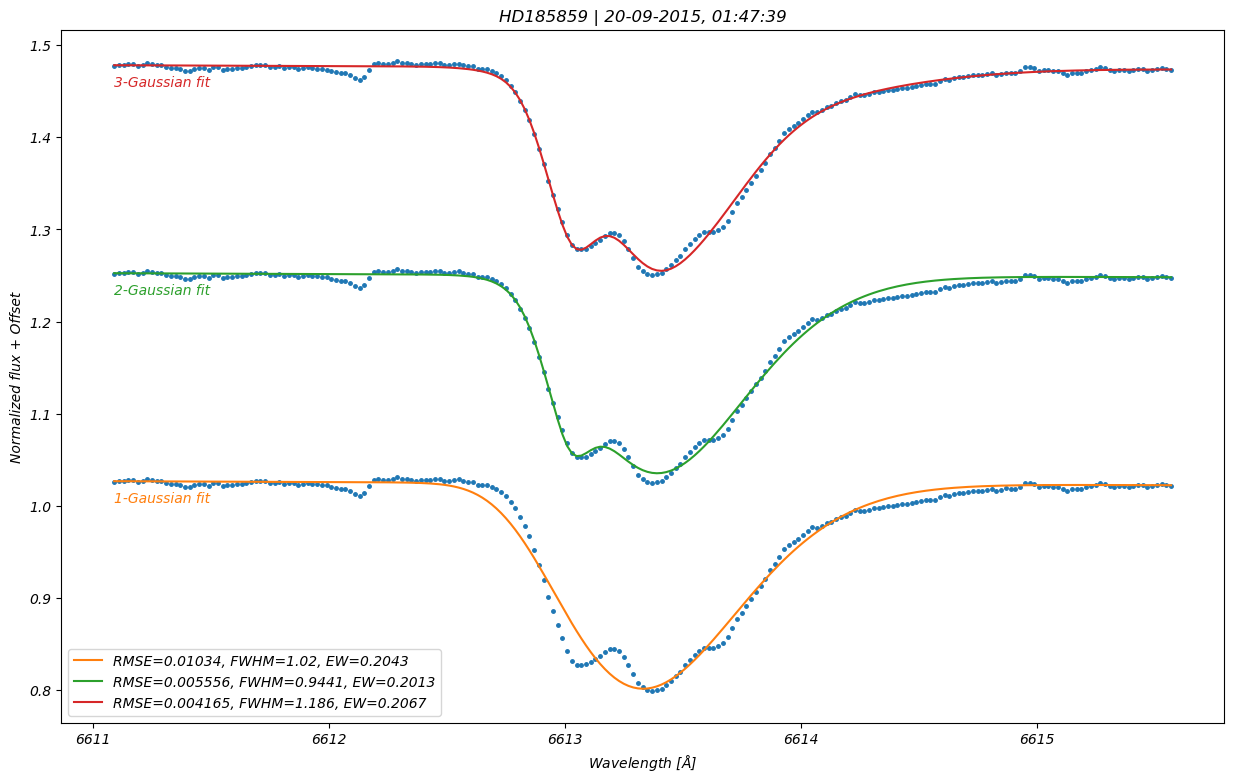

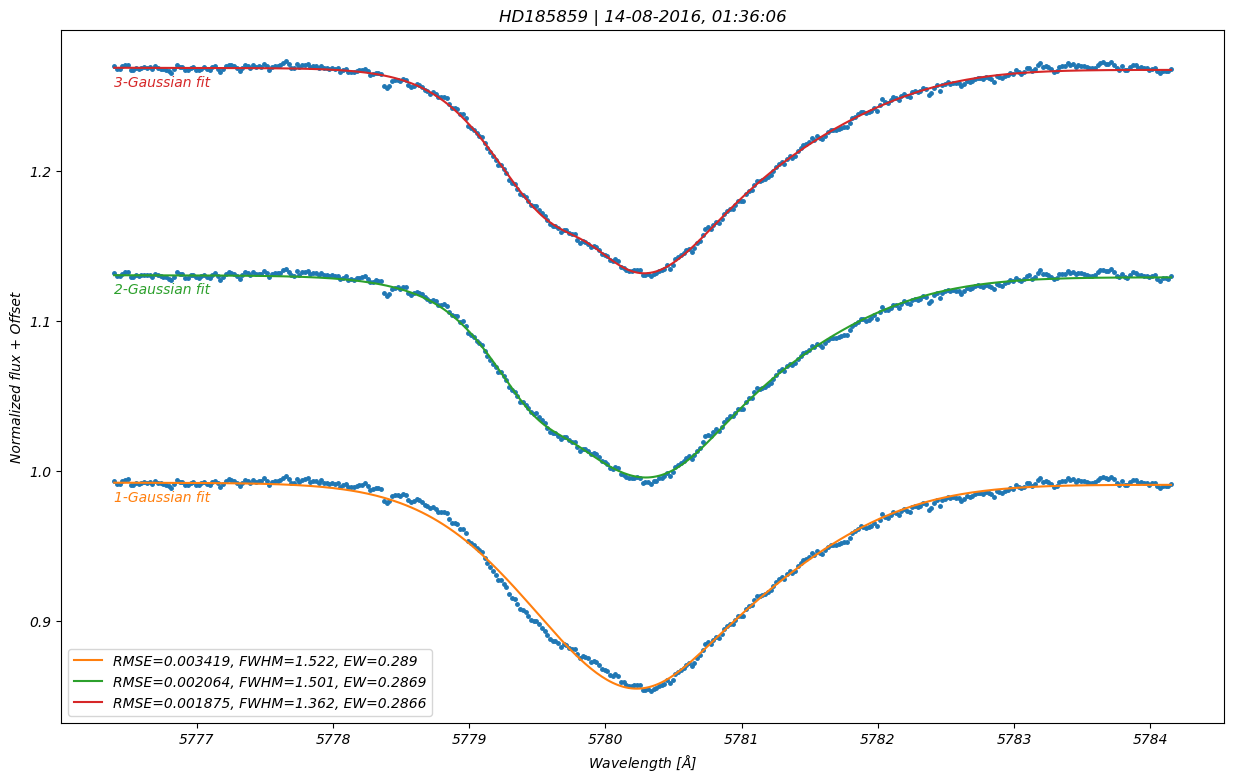

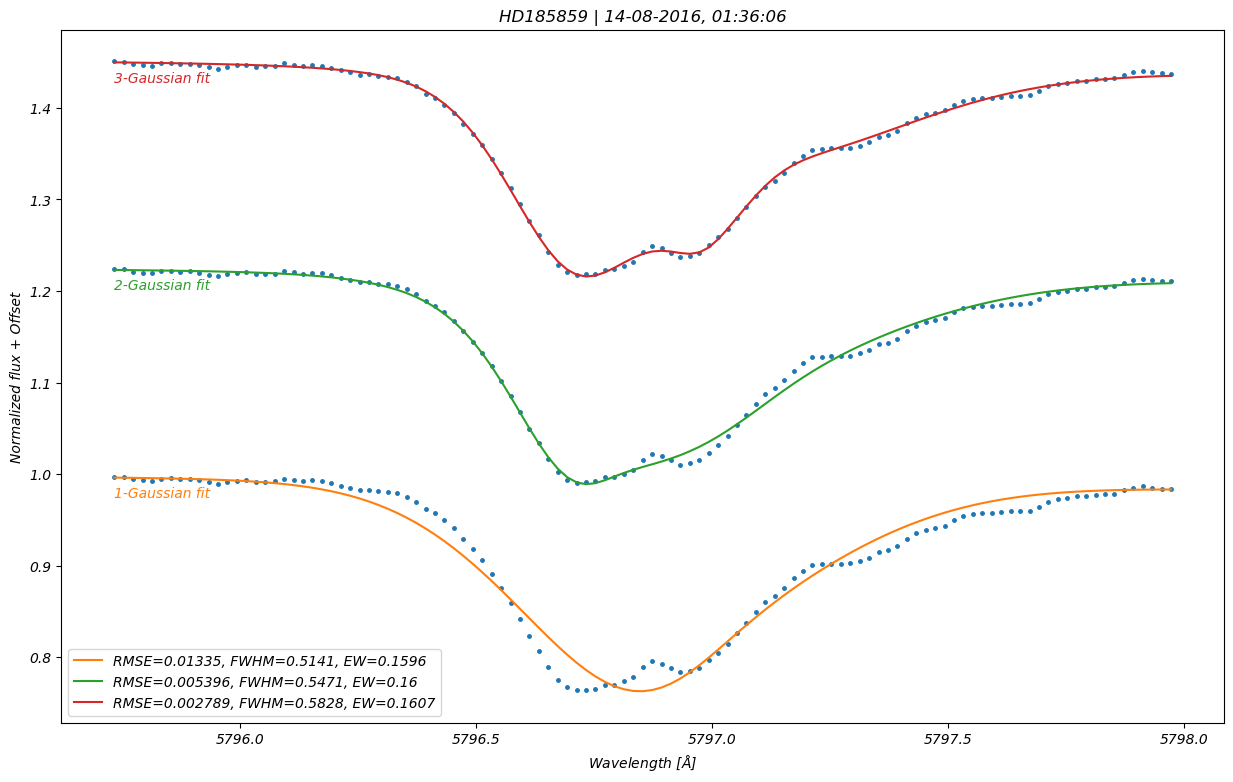

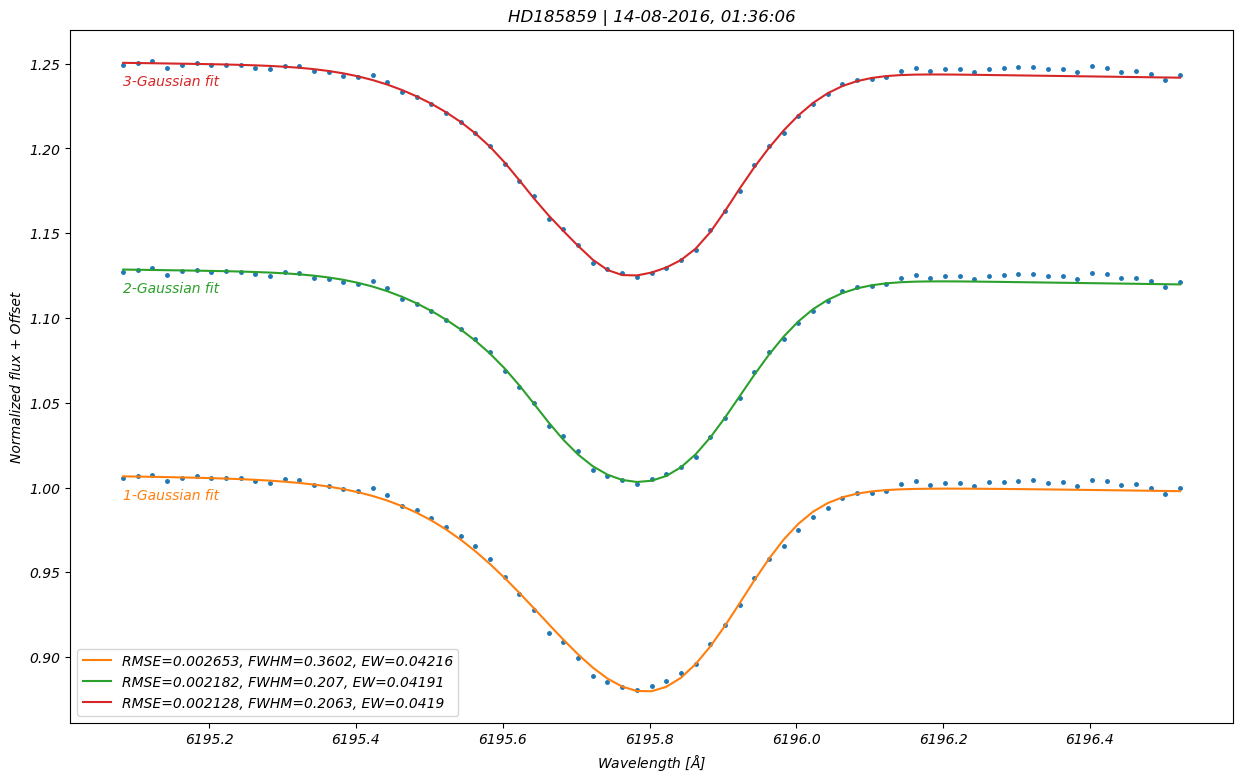

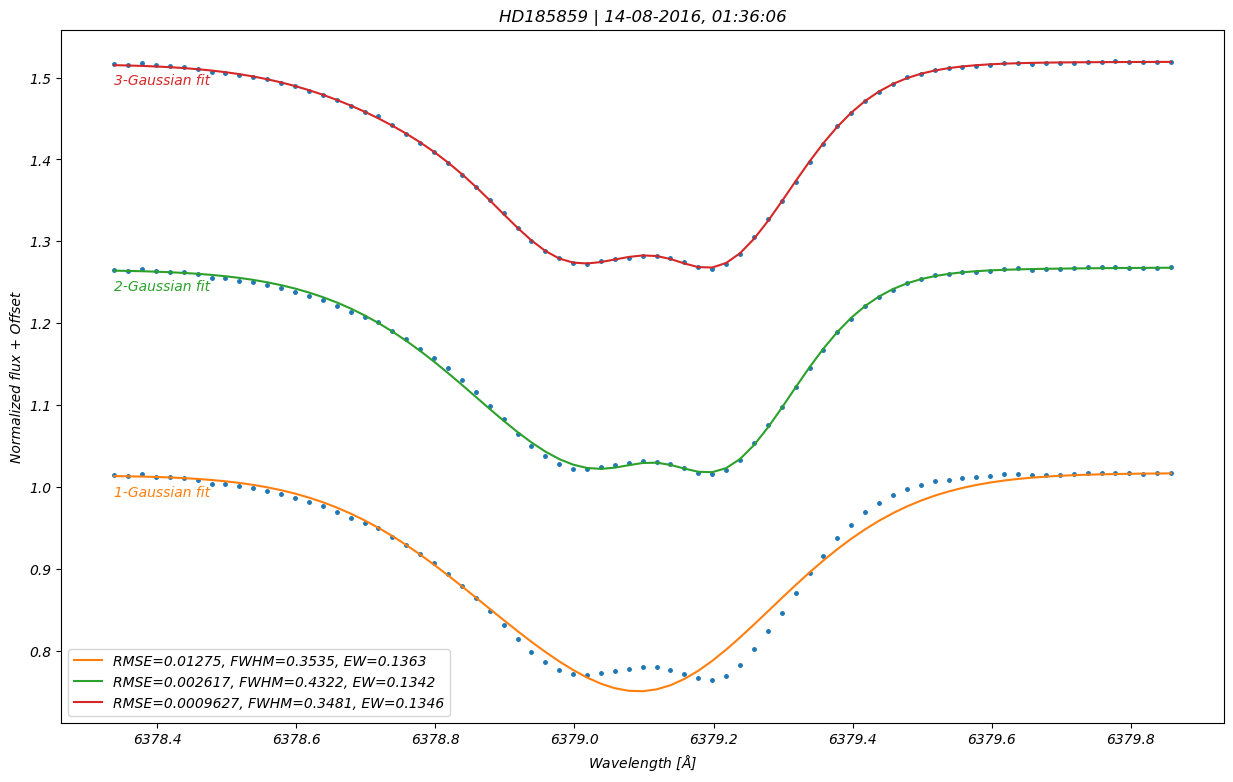

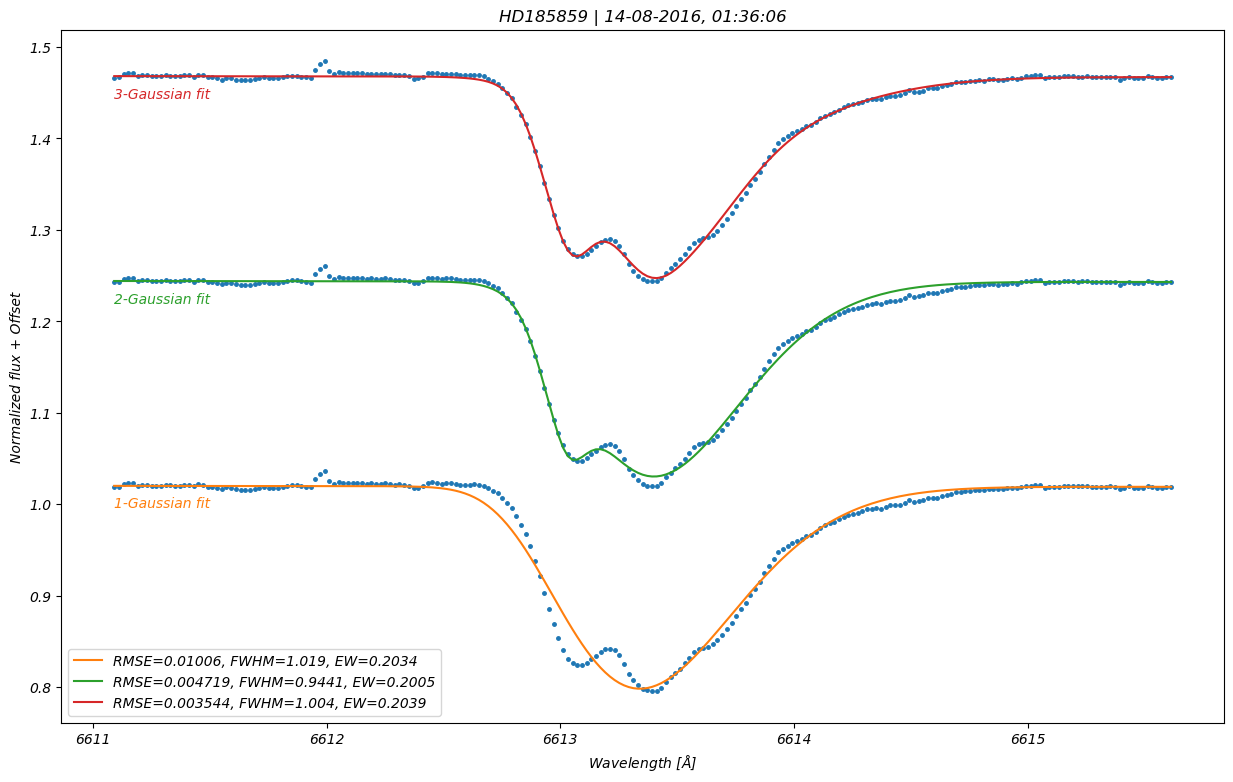

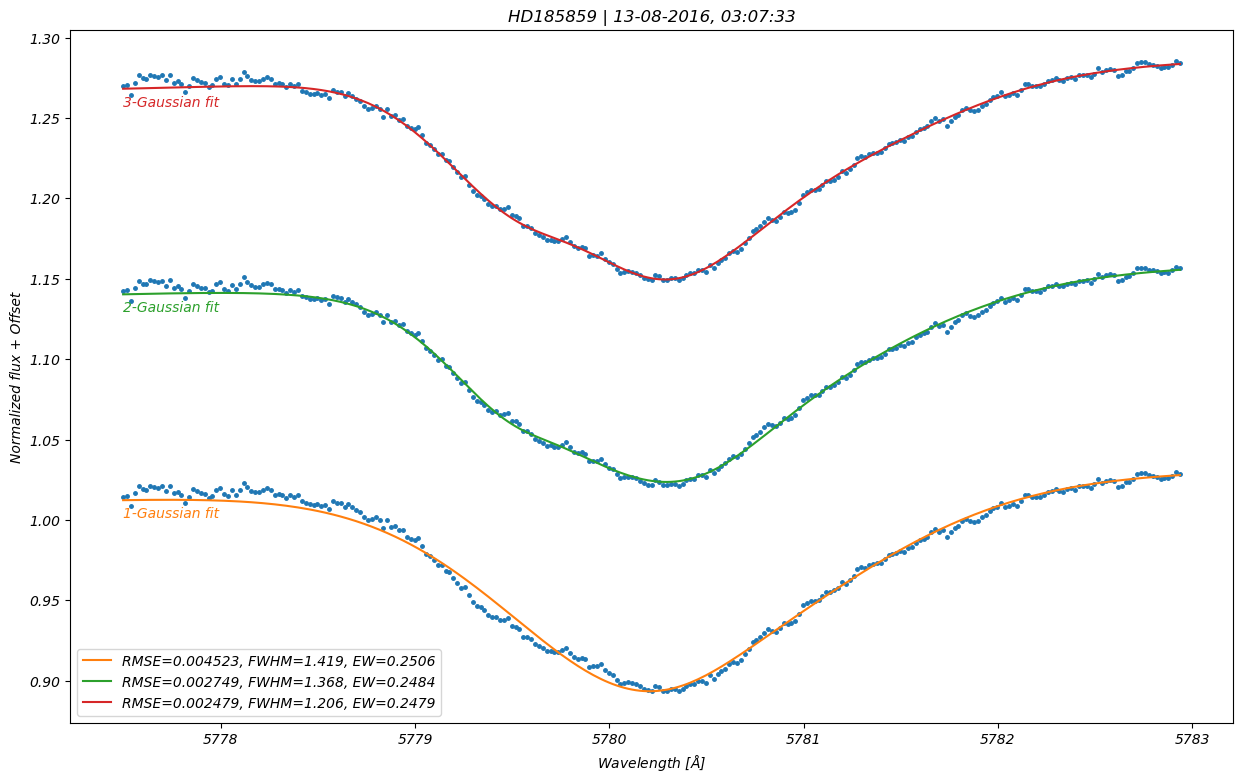

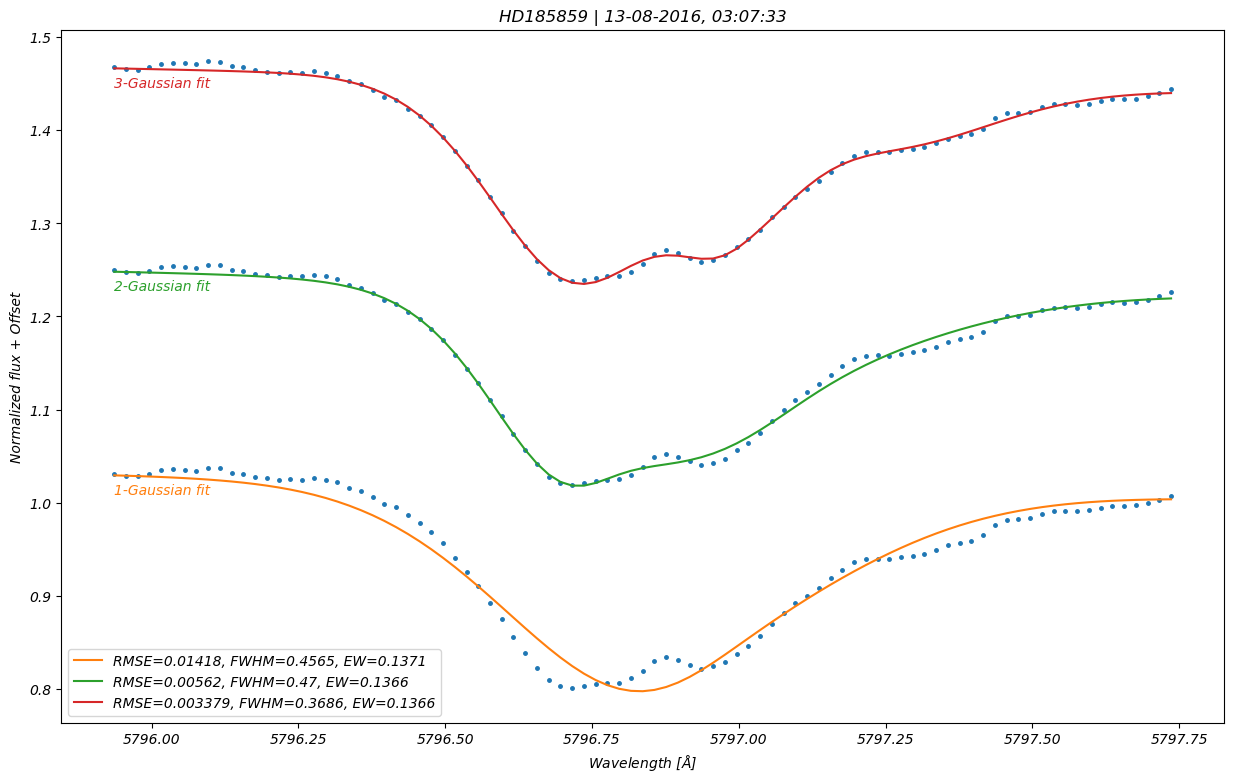

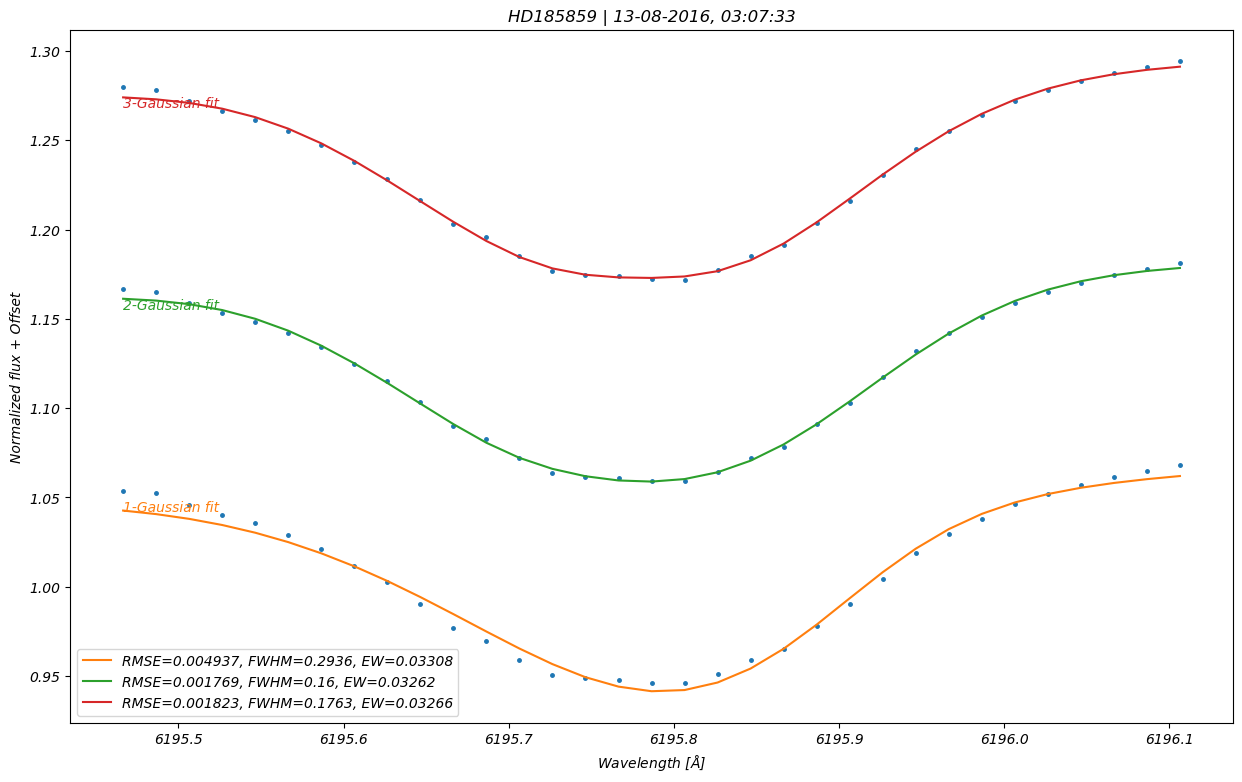

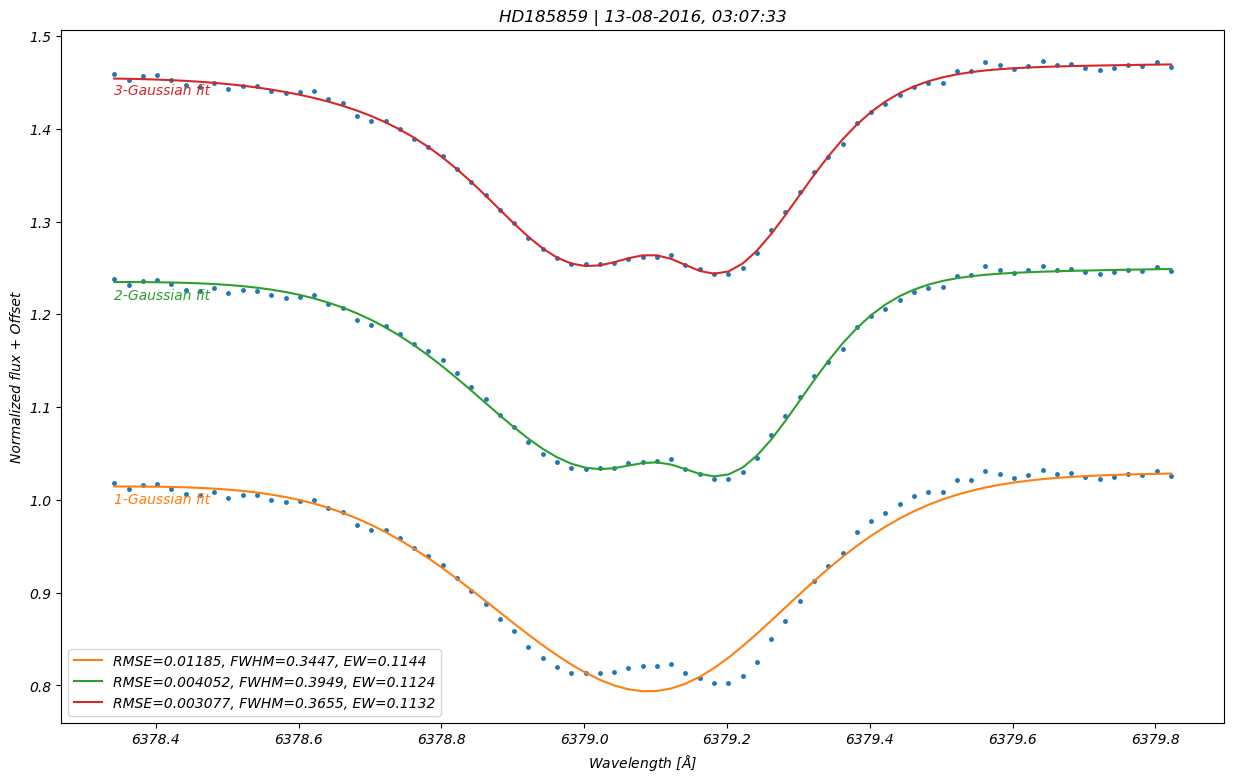

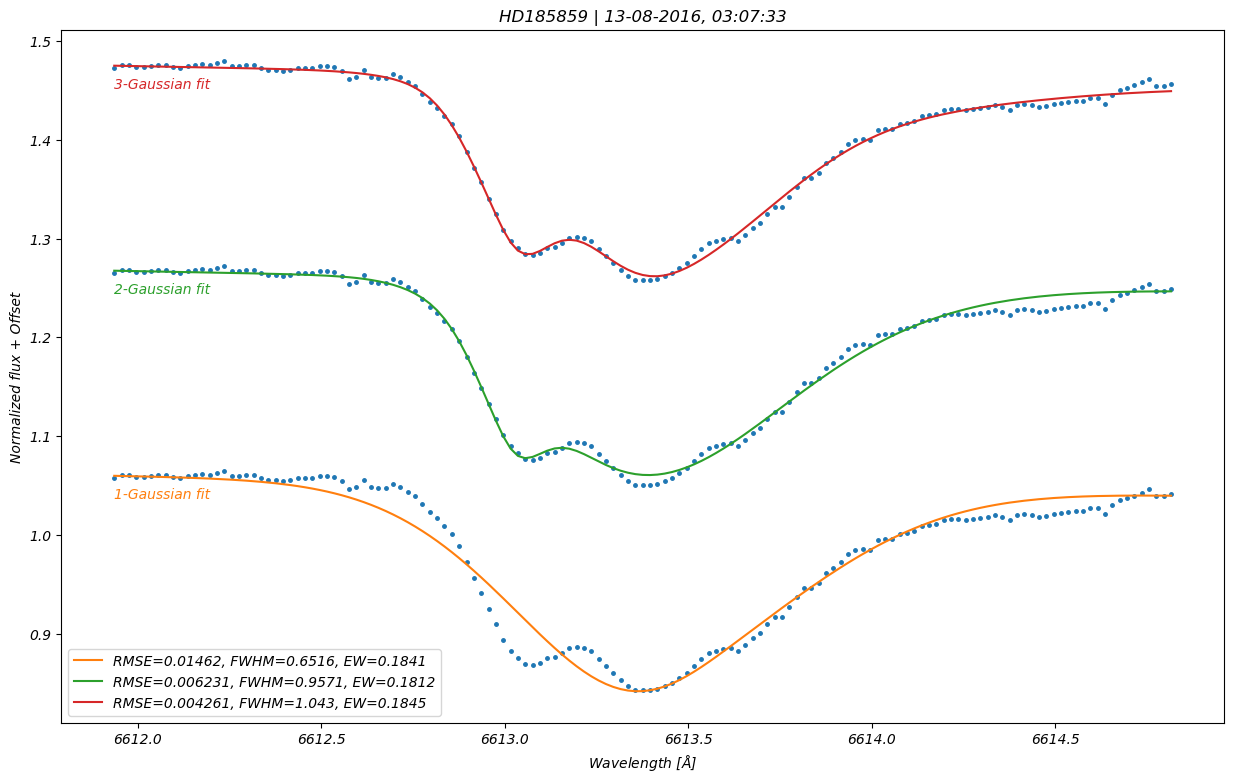

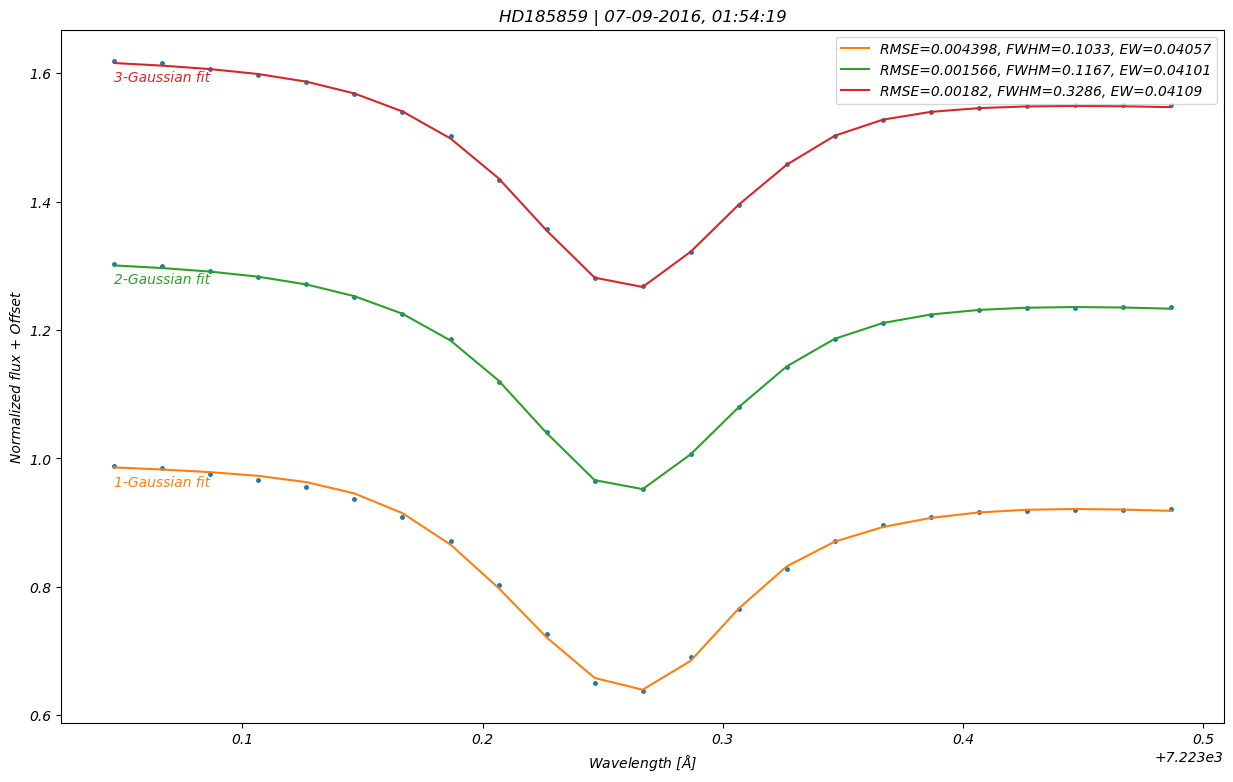

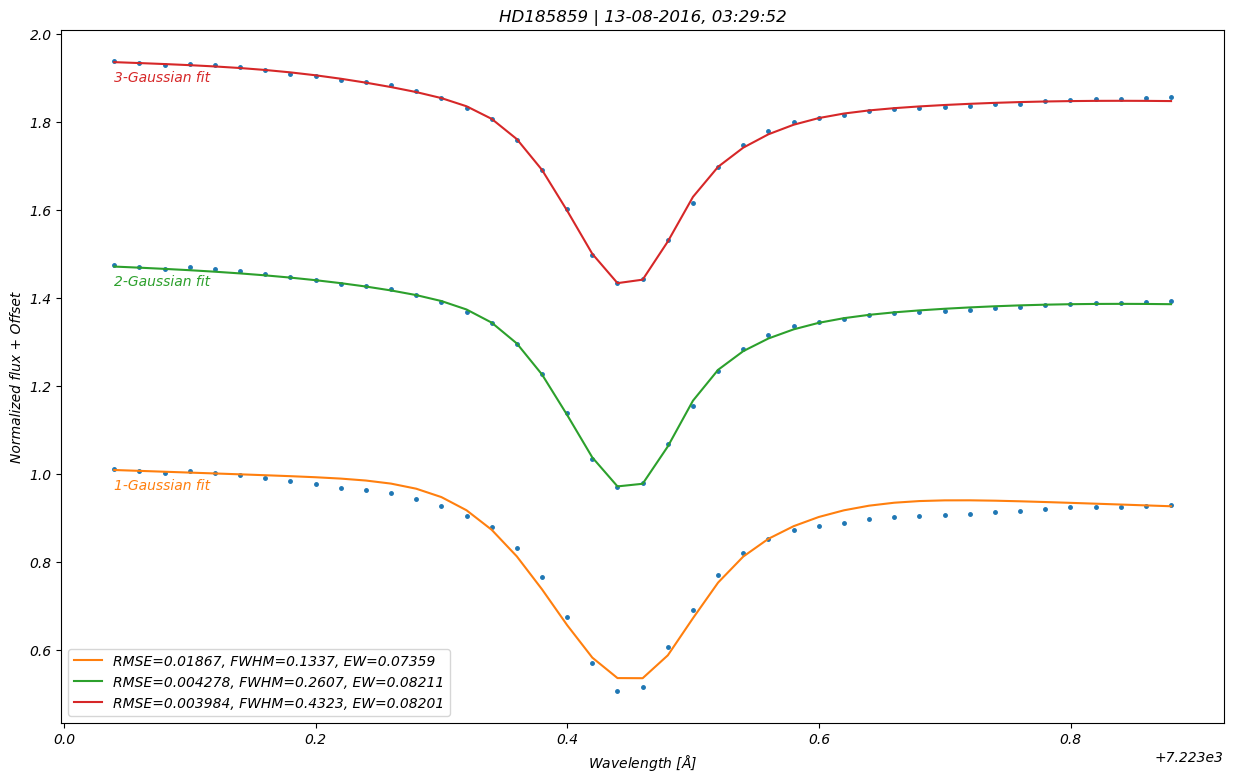

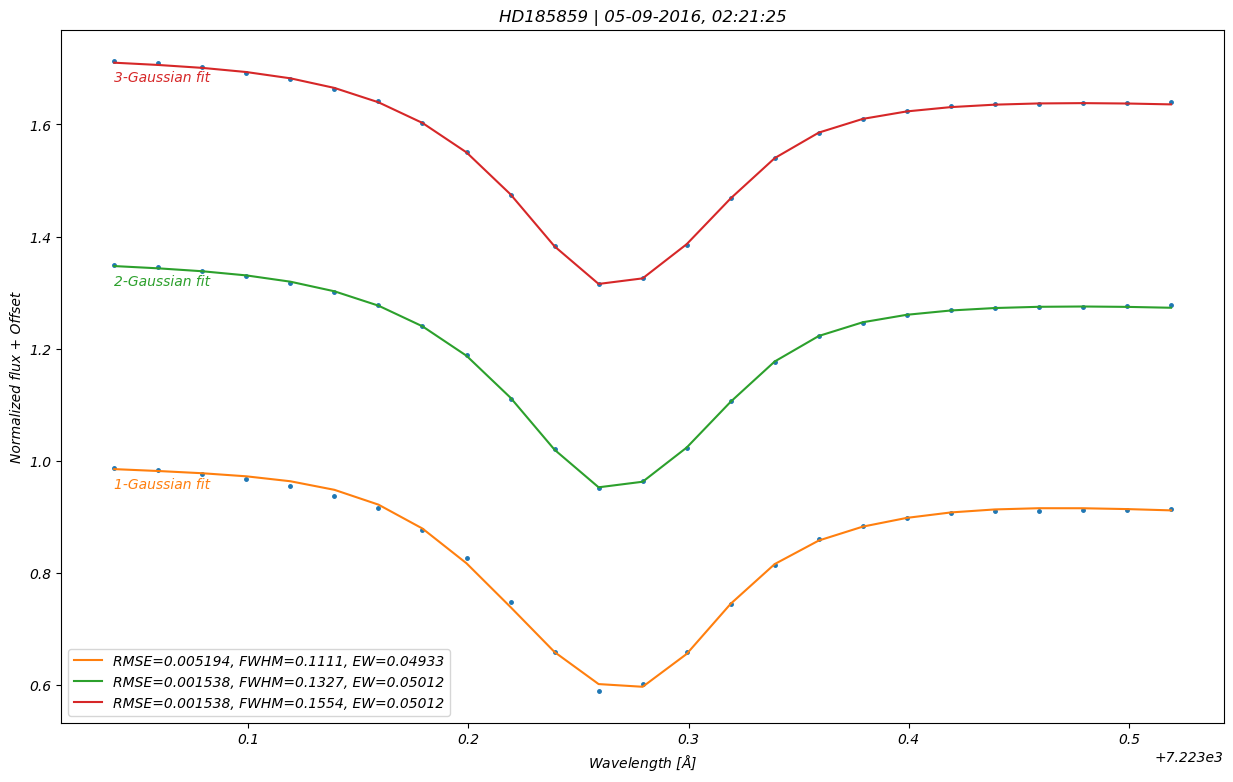

In [3]:
fit_gaussian_for_targets('HD185859', dib_centers_subset, create_figure=True)

In [4]:
_ = fit_gaussian_for_targets(['HD147889', 'HD158926', 'HD170740', 'HD185859'], dib_centers_all, filename='gaussian_fits.csv')


HD147889 | λ=8523-1.042e+04:   0%|          | 0/4 [04:47<?, ?it/s]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (378, 10) + inhomogeneous part.

In [ ]:
fit_gaussian_for_targets(os.listdir('data/fits'), filename='gaussian_fits_all.csv')